In [ ]:
import os
os.getcwd()

In [3]:
try:
    from collections import OrderedDict
except ImportError:
    from ordereddict import OrderedDict
    
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db
Cleanreview_df = pd.read_csv('Cleanreview_VideoGames.csv' )


In [2]:
Cleanreview_df.head()

,Rating,ReviewerID,ProductID,ReviewerName,ProductDescription,Price,Categories,ReviewText,RatingClass,ReviewDate,CleanText
0,5,A1HP7NVNPFMA4N,0700026657,Ambrosia075,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",but when you do it's great. This game is a bit...,positive,2015-10-17,great game bite hard get hang great
1,4,A1JGAP0185YJI6,0700026657,travis,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","But in spite of that it was fun, I liked it I ...",positive,2015-07-27,spite fun like play alright steam bite trouble...
2,3,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Three Stars ok game.,positive,2015-02-23,three star ok game
3,2,A2204E1TH211HT,0700026657,Grandma KR,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Two Stars found the game a bit too complicated...,negative,2015-02-20,two star find game bite complicate not expect ...
4,5,A2RF5B5H74JLPE,0700026657,jon,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","love this game great game, I love it and have ...",positive,2014-12-25,love game great game love play since arrive


In [12]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497240 entries, 0 to 497239
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Rating              497240 non-null  int64         
 1   ReviewerID          497240 non-null  object        
 2   ProductID           497240 non-null  object        
 3   ReviewerName        497131 non-null  object        
 4   ProductDescription  287372 non-null  object        
 5   Price               356582 non-null  float64       
 6   Categories          359654 non-null  object        
 7   ReviewText          497240 non-null  object        
 8   RatingClass         497240 non-null  object        
 9   ReviewDate          497240 non-null  datetime64[ns]
 10  CleanText           497187 non-null  object        
 11  ReviewYear          497240 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 45.5+ MB


In [4]:
#df['date'].dt.year
Cleanreview_df['ReviewDate'] = pd.to_datetime(Cleanreview_df['ReviewDate'])

Cleanreview_df['ReviewYear'] = Cleanreview_df['ReviewDate'].dt.year
Cleanreview_df.head()


,Rating,ReviewerID,ProductID,ReviewerName,ProductDescription,Price,Categories,ReviewText,RatingClass,ReviewDate,CleanText,ReviewYear
0,5,A1HP7NVNPFMA4N,0700026657,Ambrosia075,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",but when you do it's great. This game is a bit...,positive,2015-10-17,great game bite hard get hang great,2015
1,4,A1JGAP0185YJI6,0700026657,travis,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","But in spite of that it was fun, I liked it I ...",positive,2015-07-27,spite fun like play alright steam bite trouble...,2015
2,3,A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Three Stars ok game.,positive,2015-02-23,three star ok game,2015
3,2,A2204E1TH211HT,0700026657,Grandma KR,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]",Two Stars found the game a bit too complicated...,negative,2015-02-20,two star find game bite complicate not expect ...,2015
4,5,A2RF5B5H74JLPE,0700026657,jon,"Anno 2070, the newest version of the award-win...",39.99,"[['Video Games', 'PC', 'Games']]","love this game great game, I love it and have ...",positive,2014-12-25,love game great game love play since arrive,2014


In [24]:
 classCounts=Cleanreview_df.groupby(['Rating','ReviewYear']).size()
print(classCounts)


#class_counts
class_counts.to_csv('ReviewRatingClass.csv')


Rating  ReviewYear
1       1999              3
        2000             99
        2001            260
        2002            394
        2003            326
                      ...  
5       2014          47867
        2015          62012
        2016          51143
        2017          26678
        2018           7942
Length: 100, dtype: int64


In [15]:
rows=[3,4]
column=['ReviewText','CleanText','RatingClass']
Cleanreview_df.loc[rows,column]

,ReviewText,CleanText,RatingClass
3,Two Stars found the game a bit too complicated...,two star find game bite complicate not expect ...,negative
4,"love this game great game, I love it and have ...",love game great game love play since arrive,positive


In [8]:
#df = pd.DataFrame({'col':np.random.randn(12000), 'target':np.random.randint(low = 0, high = 2, size=12000)})
#new_df = df.groupby('target').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)

Balanced2014Review= pd.DataFrame({'ReviewerID':np.random.randn(15000), 'Rating':np.random.randint(low = 1, high = 5, size=15000)})

Balanced2014Review.groupby(['Rating']).size()
Balanced2014Review.head()

,ReviewerID,Rating
0,0.712774,3
1,0.868777,1
2,0.297237,1
3,0.091346,1
4,0.018274,4


In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497240 entries, 0 to 497239
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Rating              497240 non-null  int64         
 1   ReviewerID          497240 non-null  object        
 2   ProductID           497240 non-null  object        
 3   ReviewerName        497131 non-null  object        
 4   ProductDescription  287372 non-null  object        
 5   Price               356582 non-null  float64       
 6   Categories          359654 non-null  object        
 7   ReviewText          497240 non-null  object        
 8   RatingClass         497240 non-null  object        
 9   ReviewDate          497240 non-null  datetime64[ns]
 10  CleanText           497187 non-null  object        
 11  ReviewYear          497240 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 45.5+ MB


In [7]:
Cleanreview_df.isnull().sum()

Cleanreview_df=Cleanreview_df.dropna(subset=['CleanText'])

In [8]:
Cleanreview_df.isnull().sum()

Rating                     0
ReviewerID                 0
ProductID                  0
ReviewerName             109
ProductDescription    209843
Price                 140639
Categories            137567
ReviewText                 0
RatingClass                0
ReviewDate                 0
CleanText                  0
ReviewYear                 0
dtype: int64

In [32]:
contains_digit = any(map(str.isdigit, Cleanreview_df['RatingClass']))
print(contains_digit) 

False


In [9]:

pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [11]:
#sampling with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
# define the dataset location

X = Cleanreview_df['CleanText']
y = Cleanreview_df['Rating']


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X, y,train_size=90000,
                                                  test_size = 30000,
                                                  random_state=12)

'''
from imblearn.over_sampling import SMOTE 
sm = SMOTE(k_neighbors=1, random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, df.labels) 
'''

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [12]:
x_test_res, y_test_res = sm.fit_resample(x_val, y_val)

In [13]:
#Verifying oversampling 
y_test_res.value_counts()
y_train_res.value_counts()

5    18012
4    18012
3    18012
2    18012
1    18012
Name: Rating, dtype: int64

In [13]:
pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
Note: you may need to restart the kernel to use updated packages.


In [50]:
#Modelling
import itertools
# Confusion Matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [14]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test_res, predictions)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=[1,2,3,4,5], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [15]:
def modeling(Model, Xtrain = x_train_res, Xtest = x_test_res):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [16]:
#Function call for Logistic Regression

logisticRegr = LogisticRegression()

logisticRegr.fit(x_train_res, y_train_res)

predictions = logisticRegr.predict(x_test_res)

In [17]:
score = logisticRegr.score(x_test_res, y_test_res)
#score = f1_score(y_test_res, predictions, average = 'weighted')
print(score)

0.6198737121967431


In [18]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           1       0.70      0.70      0.70     18054
           2       0.53      0.48      0.51     18054
           3       0.51      0.54      0.52     18054
           4       0.61      0.61      0.61     18054
           5       0.74      0.77      0.75     18054

    accuracy                           0.62     90270
   macro avg       0.62      0.62      0.62     90270
weighted avg       0.62      0.62      0.62     90270



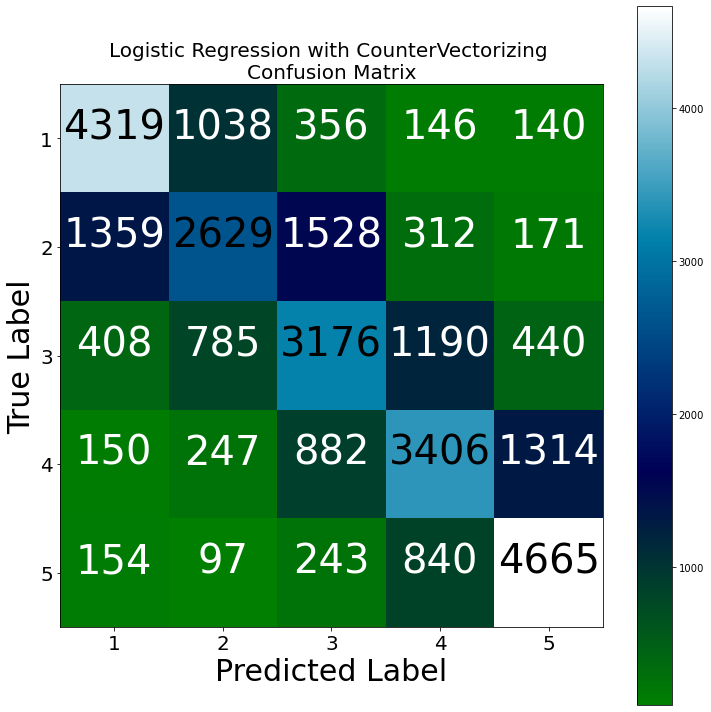

In [22]:
disp_confusion_matrix(predictions, "Logistic Regression")

In [17]:
# Fuction to compute alpha value
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha


In [23]:
#optimal_alpha_bow = naive_bayes(x_train_res, y_train_res)

In [19]:
#Modelling using Naive Bayes
# instantiate learning model alpha = optimal_alpha

from sklearn.naive_bayes import MultinomialNB
nb_optimal =  MultinomialNB(alpha = 1.0)

# fitting the model
nb_optimal.fit(x_train_res, y_train_res)

# predict the response


MultinomialNB()

In [20]:
predictions = nb_optimal.predict(x_test_res)

In [21]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           1       0.78      0.47      0.59      5999
           2       0.42      0.65      0.51      5999
           3       0.41      0.64      0.50      5999
           4       0.53      0.45      0.48      5999
           5       0.92      0.43      0.59      5999

    accuracy                           0.53     29995
   macro avg       0.61      0.53      0.53     29995
weighted avg       0.61      0.53      0.53     29995



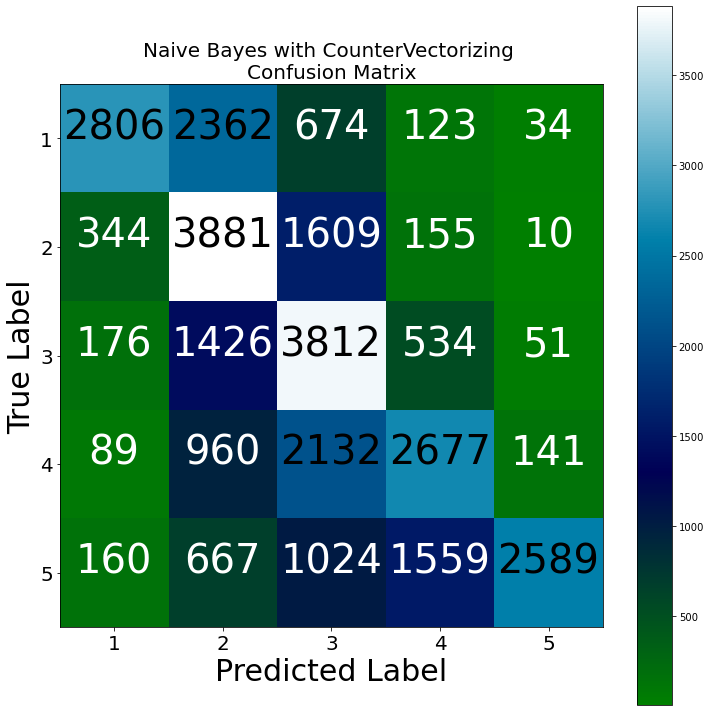

In [22]:
disp_confusion_matrix(predictions, "Naive Bayes")

In [19]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tensorflow

  Using cached tensorflow-2.4.1-cp37-cp37m-manylinux2010_x86_64.whl (394.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
Processing ./.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6/wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Processing ./.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2/termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached grpcio-1.32.0-cp37-cp37m-man

In [21]:
pip install nltk

Processing ./.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266/nltk-3.5-py3-none-any.whl
  Using cached regex-2020.11.13-cp37-cp37m-manylinux2014_x86_64.whl (719 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install chart_studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install cufflinks

Processing ./.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0/cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
#LSTM modelling
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
import chart_studio.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [25]:
# The maximum number of words to be used. (most frequent)

'''
X = Cleanreview_df['CleanText']
y = Cleanreview_df['Rating']
'''
MAX_NB_WORDS = 50000
# Max number of words in each Review.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#, lower=True
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True
                     )
tokenizer.fit_on_texts(Cleanreview_df['CleanText'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

"\nX = Cleanreview_df['CleanText']\ny = Cleanreview_df['Rating']\n"

Found 308309 unique tokens.


In [26]:
X = tokenizer.texts_to_sequences(Cleanreview_df['CleanText'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (497187, 250)


In [27]:
Y = pd.get_dummies(Cleanreview_df['Rating']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (497187, 5)


In [13]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [28]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 10000, train_size=30000, random_state = 4)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(30000, 250) (30000, 5)
(10000, 250) (10000, 5)


In [18]:

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
x_test_res, y_test_res = sm.fit_resample(X_test, Y_test)

In [29]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
422/422 [==============================] - 227s 531ms/step - loss: 1.0712 - accuracy: 0.6062 - val_loss: 0.8046 - val_accuracy: 0.6823
Epoch 2/5
422/422 [==============================] - 221s 524ms/step - loss: 0.6984 - accuracy: 0.7251 - val_loss: 0.7551 - val_accuracy: 0.7030
Epoch 3/5
422/422 [==============================] - 223s 527ms/step - loss: 0.5845 - accuracy: 0.7734 - val_loss: 0.7633 - val_accuracy: 0.7017
Epoch 4/5
422/422 [==============================] - 213s 504ms/step - loss: 0.4766 - accuracy: 0.8207 - val_loss: 0.8511 - val_accuracy: 0.6910
Epoch 5/5
422/422 [==============================] - 212s 502ms/step - loss: 0.3890 - accuracy: 0.8583 - val_loss: 0.8996 - val_accuracy: 0.6943


In [22]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

313/313 [==============================] - 19s 60ms/step - loss: 1.0325 - accuracy: 0.6928
Test set
  Loss: 1.032
  Accuracy: 0.693


In [31]:
# predict probabilities for test set
yhat_probs = model.predict(Y_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(Y_test, verbose=0)

3

4

In [45]:
from sklearn.metrics import classification_report

# predict 
pred = model.predict(X_test, batch_size = 32)
#pred = np.argmax(predictions, axis=1)
# label
y_train = np.argmax(Y_test, axis=1)

print(y_train.shape, pred.shape)
print(y_train[:5], pred[:5])

(10000,) (10000, 5)
[4 3 2 4 4] [[7.95770848e-06 2.14841202e-06 6.10086572e-05 2.66433437e-03
  9.97264504e-01]
 [9.87822562e-02 3.89025718e-01 4.57934439e-01 3.54141034e-02
  1.88435093e-02]
 [1.12344496e-04 5.12645420e-05 1.65365101e-03 4.15850356e-02
  9.56597686e-01]
 [2.33650775e-04 8.44553288e-05 1.16479746e-03 2.97940541e-02
  9.68723059e-01]
 [1.64473204e-05 4.00594081e-06 1.02717648e-04 2.97484710e-03
  9.96901989e-01]]


In [47]:
print(classification_report(y_train, np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.61      0.48      0.54       653
           1       0.33      0.28      0.30       501
           2       0.42      0.42      0.42       945
           3       0.49      0.42      0.45      1866
           4       0.82      0.88      0.85      6035

    accuracy                           0.70     10000
   macro avg       0.53      0.50      0.51     10000
weighted avg       0.68      0.70      0.69     10000



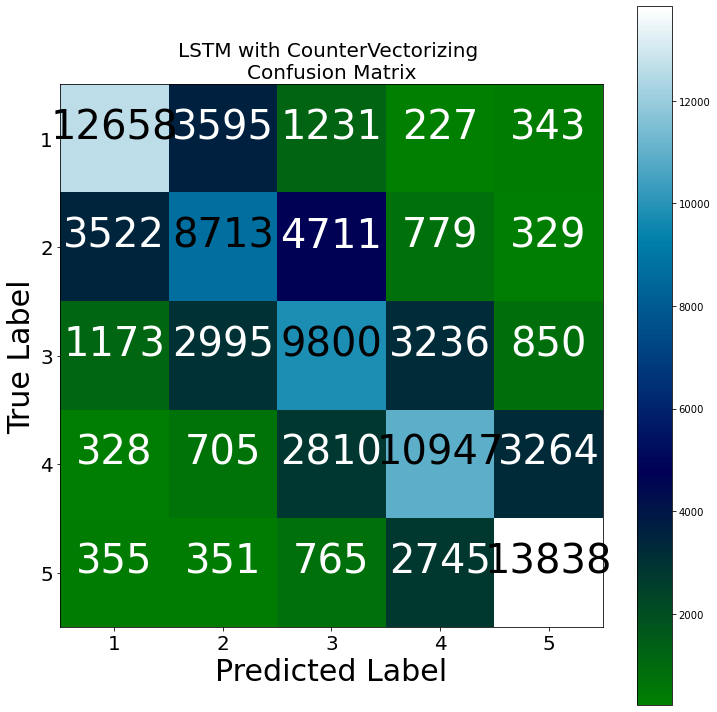

In [48]:
disp_confusion_matrix(pred, "LSTM")

In [25]:
#binomial predictions flow
X_bin = Cleanreview_df['CleanText']
y_bin = Cleanreview_df['RatingClass']


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X_bin = vec.fit_transform(X_bin)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_train_bin, x_val_bin, y_train_bin, y_val_bin = train_test_split(X_bin, y_bin,train_size=30000,
                                                  test_size = 10000,
                                                  random_state=12)

'''
from imblearn.over_sampling import SMOTE 
sm = SMOTE(k_neighbors=1, random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, df.labels) 
'''

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train_bin, y_train_bin)

In [34]:
x_test_res, y_test_res = sm.fit_resample(x_val_bin, y_val_bin)

In [35]:
#Modelling using Naive Bayes
# instantiate learning model alpha = optimal_alpha

from sklearn.naive_bayes import MultinomialNB
nb_optimal =  MultinomialNB(alpha = 1.0)

# fitting the model
nb_optimal.fit(x_train_res, y_train_res)

# predict the response


MultinomialNB()

In [36]:
predictions = nb_optimal.predict(x_test_res)

In [38]:

score = f1_score(y_test_res, predictions, average = 'weighted')
print(score)

0.8389437521203716


In [39]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      8909
    positive       0.94      0.73      0.82      8909

    accuracy                           0.84     17818
   macro avg       0.86      0.84      0.84     17818
weighted avg       0.86      0.84      0.84     17818



In [40]:
def disp_confusion_matrix_bin(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test_res, predictions)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Positive','Negative'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

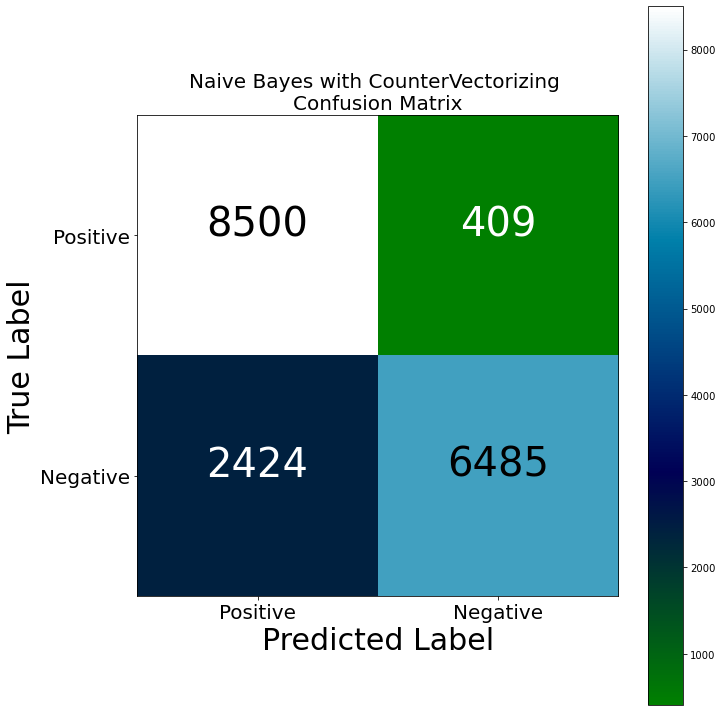

In [41]:
disp_confusion_matrix_bin(predictions, "Naive Bayes")

In [42]:
#Function call for Logistic Regression using binomial class

logisticRegr = LogisticRegression()

logisticRegr.fit(x_train_res, y_train_res)

predictions = logisticRegr.predict(x_test_res)

In [43]:
score = logisticRegr.score(x_test_res, y_test_res)
#score = f1_score(y_test_res, predictions, average = 'weighted')
print(score)

0.9017847120888989


In [44]:
print(classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

    negative       0.92      0.88      0.90      8909
    positive       0.88      0.92      0.90      8909

    accuracy                           0.90     17818
   macro avg       0.90      0.90      0.90     17818
weighted avg       0.90      0.90      0.90     17818



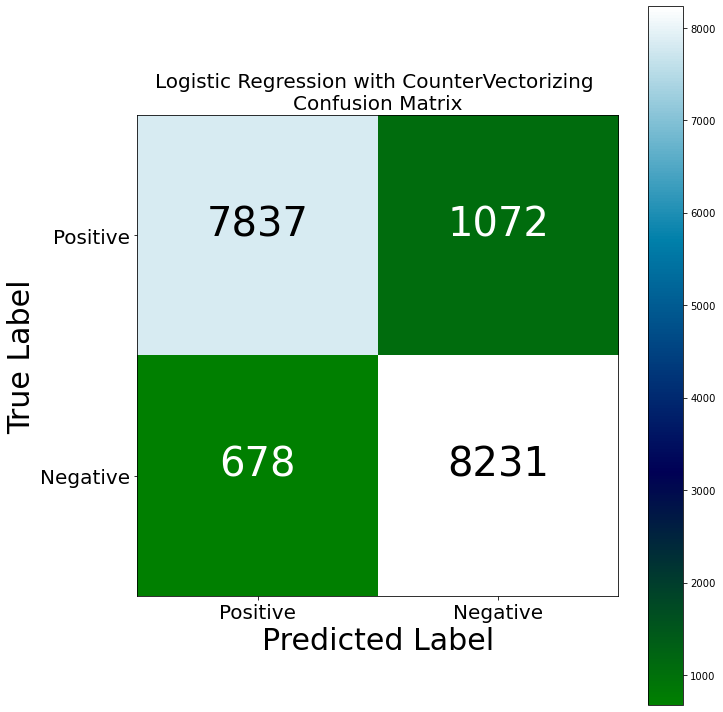

In [45]:
disp_confusion_matrix_bin(predictions, "Logistic Regression")

In [ ]:
#LSTM using binomial class

In [11]:
#sampling with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
# define the dataset location


In [14]:
# The maximum number of words to be used. (most frequent)

'''
X = Cleanreview_df['CleanText']
y = Cleanreview_df['Rating']
'''
MAX_NB_WORDS = 50000
# Max number of words in each Review.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#, lower=True
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True
                     )
tokenizer.fit_on_texts(Cleanreview_df['CleanText'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


"\nX = Cleanreview_df['CleanText']\ny = Cleanreview_df['Rating']\n"

Found 308309 unique tokens.


In [15]:
X = tokenizer.texts_to_sequences(Cleanreview_df['CleanText'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (497187, 250)


In [16]:
Y = pd.get_dummies(Cleanreview_df['RatingClass']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (497187, 2)


In [17]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 10000, train_size=30000, random_state = 4)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(30000, 250) (30000, 2)
(10000, 250) (10000, 2)


In [18]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [19]:
x_test_res, y_test_res = sm.fit_resample(X_test, Y_test)

In [24]:
print(x_train_res.shape[1])

250


In [ ]:
#y_train_res = np.asarray(train_labels).astype('float32').reshape((-1,1))
#y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [35]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 5,080,602
Trainable params: 5,080,602
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
422/422 [==============================] - 227s 532ms/step - loss: 0.3319 - accuracy: 0.8858 - val_loss: 0.1964 - val_accuracy: 0.9170
Epoch 2/5
422/422 [==============================] - 222s 526ms/step - loss: 0.1630 - accuracy: 0.9334 - val_loss: 0.1780 - val_accuracy: 0.9267
Epoch 3/5
422/422 [==============================] - 223s 528ms/step - loss: 0.1083 - accuracy: 0.9595 - val_loss: 0.2040 - val_accuracy: 0.9253
Epoch 4/5
422/422 [==============================] - 222s 525ms/step - loss: 0.0810 - accuracy: 0.9704 - val_loss: 0.2324 - val_accuracy: 0.9220
Epoch 5/5
422/422 [==============================] - 223s 527ms/step - loss: 0.0585 - accuracy: 0.9803 - val_loss: 0.2577 - val_accuracy: 0.9200


In [43]:
from sklearn.metrics import classification_report

# predict 
predictions = model.predict(X_test, batch_size = 32)
#pred = np.argmax(predictions, axis=1)
# label
y_train = np.argmax(Y_test, axis=1)

In [44]:
print(classification_report(y_train, np.argmax(predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.73      0.54      0.62      1154
           1       0.94      0.97      0.96      8846

    accuracy                           0.92     10000
   macro avg       0.84      0.76      0.79     10000
weighted avg       0.92      0.92      0.92     10000



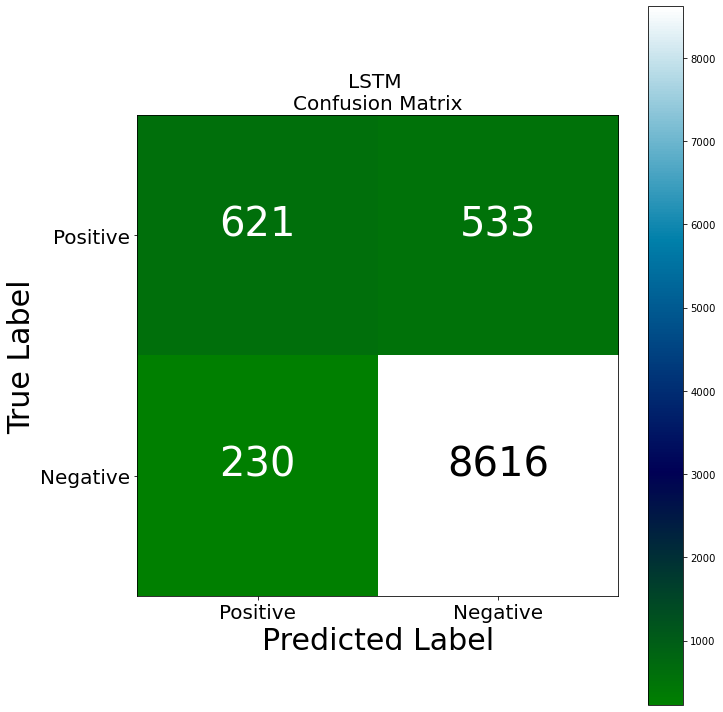

In [53]:
    cm = confusion_matrix(y_train, np.argmax(predictions, axis = 1))
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Positive','Negative'], normalize=False, 
                                 title = "LSTM" + " "+ '\nConfusion Matrix')
    plt.show()

In [58]:
#y_test_res.value_counts()
#y_train_res.value_counts()

unique_train, counts_train = np.unique(y_train_res, return_counts=True)
dict(zip(unique_train, counts_train))

unique_test, counts_test = np.unique(y_test_res, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 26709, 1: 26709}

{0: 8846, 1: 8846}

In [61]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x_train_res.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 5,080,602
Trainable params: 5,080,602
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
epochs = 5
batch_size = 64

history = model.fit(x_train_res, y_train_res, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
752/752 [==============================] - 402s 531ms/step - loss: 0.5029 - accuracy: 0.7424 - val_loss: 0.3006 - val_accuracy: 0.8849
Epoch 2/5
752/752 [==============================] - 399s 531ms/step - loss: 0.2260 - accuracy: 0.9114 - val_loss: 0.1801 - val_accuracy: 0.9242
Epoch 3/5
752/752 [==============================] - 402s 534ms/step - loss: 0.1684 - accuracy: 0.9360 - val_loss: 0.1221 - val_accuracy: 0.9553
Epoch 4/5
752/752 [==============================] - 401s 533ms/step - loss: 0.1153 - accuracy: 0.9575 - val_loss: 0.1554 - val_accuracy: 0.9390
Epoch 5/5
752/752 [==============================] - 394s 524ms/step - loss: 0.1124 - accuracy: 0.9583 - val_loss: 0.2315 - val_accuracy: 0.9214


In [63]:
from sklearn.metrics import classification_report

# predict 
predictions = model.predict(x_test_res, batch_size = 32)
#pred = np.argmax(predictions, axis=1)
# label
y_train = np.argmax(y_test_res, axis=1)

In [64]:
print(classification_report(y_train, np.argmax(predictions, axis = 1)))

              precision    recall  f1-score   support

           0       1.00      0.46      0.63     17692
           1       0.00      0.00      0.00         0

    accuracy                           0.46     17692
   macro avg       0.50      0.23      0.32     17692
weighted avg       1.00      0.46      0.63     17692



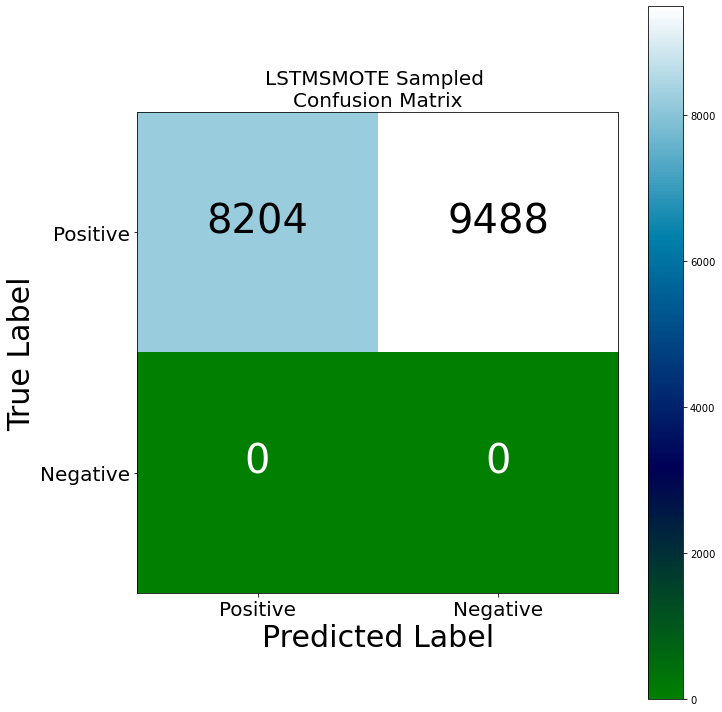

In [66]:
cm = confusion_matrix(y_train, np.argmax(predictions, axis = 1))
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Positive','Negative'], normalize=False, 
                                 title = "LSTM" +"SMOTE Sampled"+ " "+ '\nConfusion Matrix')
plt.show()